# Лабороторная работа №1
## Численное дифференцирование и интегрирование

Работа выполнена на языке python3 с использование библиотек `numpy` и `matplotlib`

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Методы численного дифференцирования
Пусть задана функция $f(x)$ на отреке $[a, b]$. Выберем на этом отрезке шаг сетки $h$. В Таком случае колличество узлом сетки будет:
$$\large {b - a} \over h$$

А сами значения $x$ можно задать как $x_i = a + hi, i = 0,...,n$

Для вычисления производной в каждой точке $x_i$ могут применяться различные методы, которые преимущественно отличаются количеством узлов, задействованных в вычислении, а также их расположением относительно точки, в которой находится производная. Степень, с которой h входит в оценку погрешности вычисления, на- зывается порядком точности метода. К методам первого порядка точности можно отнести:

#### 1. Правая разностная производная

$$\large f'(x) ≃ {{f(x+h)-f(x)} \over h}$$

In [6]:
# Вычисление правой разностной производной
def right_diff(f, x, h):
    return (f(x + h) - f(x)) / h

#### 2. Левая разностная производная

$$\Large f'(x) ≃ {{f(x) - f(x - h)} \over h}

In [7]:
# Вычисление левой разностной производной
def left_diff(f, x, h):
    return (f(x) - f(x - h)) / h

#### Центральная разностная проивзодная
В целях повышения точности можно задействовать три узла таким образом, что:

$$\Large y'_i ≃ {{y_{i+1} - y_{i-1}} \over 2h}$$

Данный подход имеет второй порядок точности.

In [8]:
# Вычисление центральной разностной производной
def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

### Задачи

1. Реализуйте перечисленные выше методы нахождения производной при фикси- рованном значении шага.
2. Возьмите 2 произвольные функции. Вычислите аналитически производные этих функций. Постройте их графики, а также вычисленные значения численной производной в узлах сетки.

Рассмотрим функции $ f_1(x) = x ^ 3 $ и $ f_2(x) = sin(x) $

In [9]:
# наши функции

def f1(x):
    return x**3

def der1(x):
    return 3 * x**2

def f2(x):
    return x * np.sin(x)

def der2(x):
    return np.sin(x) + x * np.cos(x)

Построим график функции $f_1(x)$ и её проивзодных:

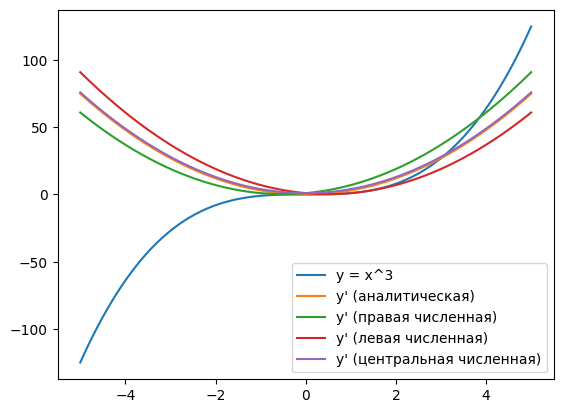

In [10]:
x = np.linspace(-5, 5, 100)
y1 = f1(x)
dy1_analytic = der1(x)
k = 1

dy1_right = right_diff(f1, x, k)
dy1_left = left_diff(f1, x, k)
dy1_central = central_diff(f1, x, k)

plt.plot(x, y1, label='y = x^3')
plt.plot(x, dy1_analytic, label='y\' (аналитическая)')
plt.plot(x, dy1_right, label='y\' (правая численная)')
plt.plot(x, dy1_left, label='y\' (левая численная)')
plt.plot(x, dy1_central, label='y\' (центральная численная)')
plt.legend()
plt.show()

Построим график функции $f_2(x)$ и её производных

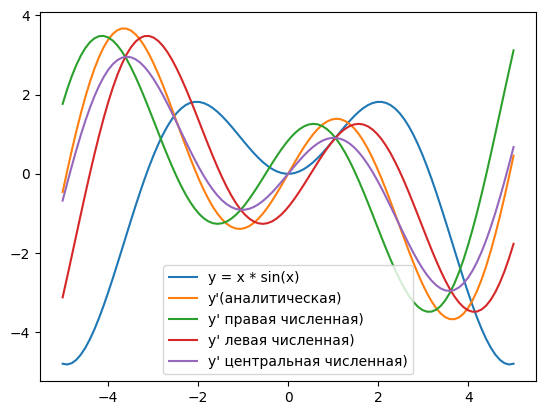

In [11]:
y2 = f2(x)
dy2_analytic = der2(x)
dy2_right = right_diff(f2, x, k)
dy2_left = left_diff(f2, x, k)
dy2_central = central_diff(f2, x, k)

plt.plot(x, y2, label='y = x * sin(x)')
plt.plot(x, dy2_analytic, label='y\'(аналитическая)')
plt.plot(x, dy2_right, label='y\' правая численная)')
plt.plot(x, dy2_left, label='y\' левая численная)')
plt.plot(x, dy2_central, label='y\' центральная численная)')
plt.legend()
plt.show()

Теперь рассчитаем среднеквадратичное отклонение значений производной, полученных вычислительынм путем, от значений, полученных аналитически.

$$\Large \sum_{i=0}^n (y_i-ŷ_i)^2$$

In [13]:
mse1_right = np.mean((dy1_right - dy1_analytic)**2)
mse1_left = np.mean((dy1_left - dy1_analytic)**2)
mse1_central = np.mean((dy1_central - dy1_analytic)**2)

print('СКО (функция f(x) = x^3):')
print('СКО для правой:', mse1_right)
print('СКО для левой:', mse1_left)
print('СКО для центральной:', mse1_central)

СКО (функция f(x) = x^3):
СКО для правой: 77.51515151515152
СКО для левой: 77.51515151515154
СКО для центральной: 1.0000000000000009
СКО (функция f(x) = x * sin(x)):
СКО для правой: 1.5172211084242033
СКО для левой: 1.5172211084242033
СКО для центрпльной: 0.2208664418461721


In [ ]:
mse2_right = np.mean((dy2_right - dy2_analytic)**2)
mse2_left = np.mean((dy2_left - dy2_analytic)**2)
mse2_central = np.mean((dy2_central - dy2_analytic)**2)


print('СКО (функция f(x) = x * sin(x)):')
print('СКО для правой:', mse2_right)
print('СКО для левой:', mse2_left)
print('СКО для центрпльной:', mse2_central)

Построим графики зависимости среднеквадратичного отклонения от значения $h$

In [15]:
mse1_right_list = []
mse1_left_list = []
mse1_central_list = []
mse2_right_list = []
mse2_left_list = []
mse2_central_list = []
h_list = [k / i for i in range(1, 128 + 1)]
print(h_list)

for h in h_list:
    dy1_right = right_diff(f1, x, h)
    dy1_left = left_diff(f1, x, h)
    dy1_central = central_diff(f1, x, h)

    mse1_right = np.mean((dy1_right - dy1_analytic)**2)
    mse1_left = np.mean((dy1_left - dy1_analytic)**2)
    mse1_central = np.mean((dy1_central - dy1_analytic)**2)

    mse1_right_list.append(mse1_right)
    mse1_left_list.append(mse1_left)
    mse1_central_list.append(mse1_central)

    dy2_right = right_diff(f2, x, h)
    dy2_left = left_diff(f2, x, h)
    dy2_central = central_diff(f2, x, h)

    mse2_right = np.mean((dy2_right - dy2_analytic)**2)
    mse2_left = np.mean((dy2_left - dy2_analytic)**2)
    mse2_central = np.mean((dy2_central - dy2_analytic)**2)

    mse2_right_list.append(mse2_right)
    mse2_left_list.append(mse2_left)
    mse2_central_list.append(mse2_central)

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05, 0.047619047619047616, 0.045454545454545456, 0.043478260869565216, 0.041666666666666664, 0.04, 0.038461538461538464, 0.037037037037037035, 0.03571428571428571, 0.034482758620689655, 0.03333333333333333, 0.03225806451612903, 0.03125, 0.030303030303030304, 0.029411764705882353, 0.02857142857142857, 0.027777777777777776, 0.02702702702702703, 0.02631578947368421, 0.02564102564102564, 0.025, 0.024390243902439025, 0.023809523809523808, 0.023255813953488372, 0.022727272727272728, 0.022222222222222223, 0.021739130434782608, 0.02127659574468085, 0.020833333333333332, 0.02040816326530612, 0.02, 0.0196078431372549, 0.019230769230769232, 0.018867924528301886, 0.018518518518518517, 0.01818181818181818, 0.0

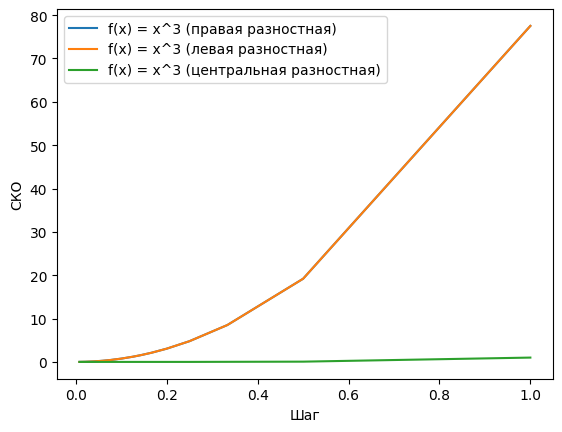

In [16]:
plt.plot(h_list, mse1_right_list, label='f(x) = x^3 (правая разностная)')
plt.plot(h_list, mse1_left_list, label='f(x) = x^3 (левая разностная)')
plt.plot(h_list, mse1_central_list, label='f(x) = x^3 (центральная разностная)')
plt.legend()
plt.xlabel('Шаг')
plt.ylabel('СКО')
plt.show()

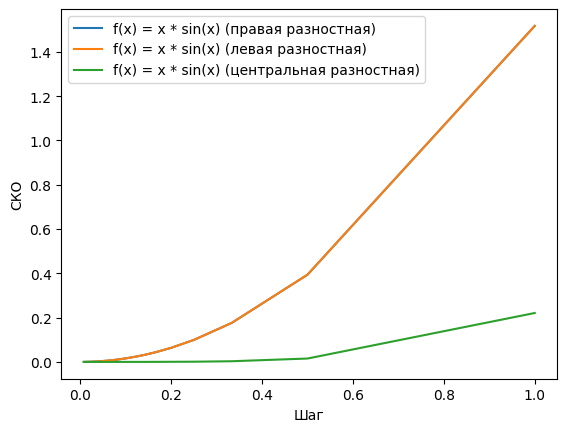

In [17]:
plt.plot(h_list, mse2_right_list, label='f(x) = x * sin(x) (правая разностная)')
plt.plot(h_list, mse2_left_list, label='f(x) = x * sin(x) (левая разностная)')
plt.plot(h_list, mse2_central_list, label='f(x) = x * sin(x) (центральная разностная)')
plt.legend()
plt.xlabel('Шаг')
plt.ylabel('СКО')
plt.show()

## Методы численного интегрирования

Для нахождения приближенного значения определенного интеграла могут использоваться так называемые квадратурные формулы:

$$\Large \int_a^b f(x)dx  ≃  \sum_0^A A_i f(\bar x_i)$$

где $\bar x_i$ - некоторые точки отрезка $[a, b]$

Введем также сетку узлов на отрезке таким же образом.

$$ a = x_0 < x_ 1 < ... < x_n = b $$

Тогда интеграл $I$ разобьется в сумму элементарных интегралов

$$ \Large I = \sum_1^n I_i $$

где каждый $I_i$ вычисляется на отрезке $[x_{i-1}, x_i]$. Геометрически это будет означать, что вся криволинейная трапеция разбивается на $n$ элементарных криволинейных трапеций. Методы численного интегрирования отличаются способом вычисления площа- дей этих элементарных криволинейных трапеций.